<a href="https://colab.research.google.com/github/Chandnahc/Projects/blob/main/ML%20models/Handwritten_digits_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

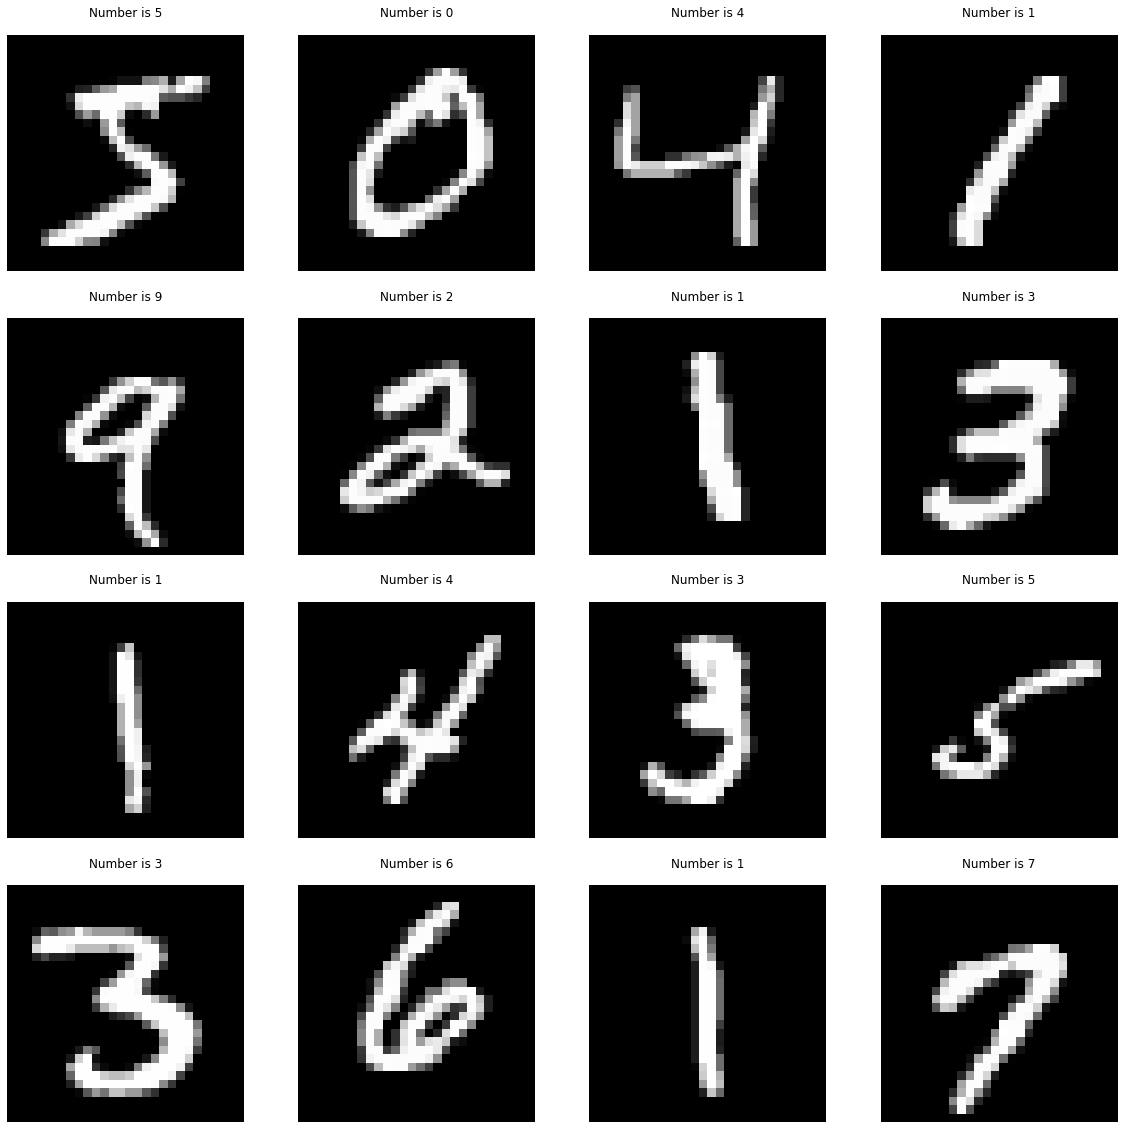

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4,4,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('number of images in x_train: ', x_train.shape[0])
print('number of images in x_test: ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
number of images in x_train:  60000
number of images in x_test:  10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2284 - accuracy: 0.9319
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1672 - accuracy: 0.9509


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1192 - accuracy: 0.9647


[0.11920414865016937, 0.9646999835968018]